In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes/description.pdf
/kaggle/input/diabetes/diabetic_data.csv


# Imposting Necssary Libraries

In [55]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd
pd.set_option('display.max_columns',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default='kaggle'
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from IPython.display import display

# Attributes Description :
# Data Set Description


**VARIABLE NAMES**: DESCRIPTION

* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










In [56]:
df=pd.read_csv('/kaggle/input/diabetes/diabetic_data.csv')

In [57]:
def SevenSigma(df):
    """
    Print basic information and statistics of the dataset for better understanding.

    Parameters:
    - df (pd.DataFrame): The input dataset.

    Returns:
    None
    """
    # Display the shape of the dataset
    print(f"Shape of the dataset: {df.shape}")
    print("\n")

    # Display a sample of the dataset
    print("Sample from Dataset:")
    display(df.sample(5).style.background_gradient(cmap='Blues'))
    print("\n")

    # Display general information about the dataset
    print("Information of Dataset:")
    display(df.info())
    print("\n")

    # Display descriptive statistics for numeric features
    print("Description of Dataset for Numeric Features:")
    display(df.describe().T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display descriptive statistics for categorical features
    print("Description of Dataset for Categorical Features:")
    display(df.describe(exclude=np.number).T.style.background_gradient(cmap='Blues'))
    print("\n")

    # Display correlation heatmap for numeric features
    print("Correlation Heatmap:")
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdYlGn', linewidths=0.2)
    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    plt.show()
    print("\n")

    # Display percentage of null values in the dataset
    print("Null Values in Dataset:")
    display(df.isnull().mean() * 100)
    print("\n")

    # Display duplicate rows in the dataset
    print("Duplicate Rows in Dataset:")
    display(df[df.duplicated()].style.background_gradient(cmap='Blues'))

In [58]:
#SevenSigma(df)

# Let's Handle Missing Values

In [59]:
df.sample(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
80417,247955340,91832562,Caucasian,Female,[40-50),?,2,6,7,5,MD,Emergency/Trauma,63,2,25,6,1,4,569,135,427,9,NaN,>8,No,No,Steady,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
26501,87325422,5336460,Caucasian,Male,[60-70),?,3,22,1,3,?,Orthopedics,24,1,22,0,0,0,715,997,518,7,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
22930,78604812,23360949,Caucasian,Male,[80-90),?,6,25,17,6,?,?,19,0,13,2,0,0,434,427,425,8,Norm,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
35222,109366812,91233216,Caucasian,Male,[70-80),?,3,5,1,7,CP,Family/GeneralPractice,58,0,10,0,0,0,486,276,288,9,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,>30
48178,147316248,23286339,AfricanAmerican,Female,[60-70),?,2,1,1,5,?,Family/GeneralPractice,42,0,21,1,4,1,491,402,250,3,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30


In [60]:
#max_glu_serum ,weight and A1Cresult has more than 85% null values so reoving it.
# examide and citoglipton has only one value so also removing it.
df.drop(columns=['max_glu_serum','A1Cresult','weight','citoglipton','examide','payer_code','medical_specialty'],inplace=True)

In [61]:
df['race'].value_counts()

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [62]:
df['race']=df['race'].apply(lambda x : 'Other' if x=='?' else x)

In [63]:
df.drop(index=[30506, 75551, 82573],inplace=True)

In [64]:
def replace_age_ranges(feature):
  age_ranges = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)','[60-70)', '[70-80)', '[80-90)', '[90-100)']
  values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
  
  for i, age_range in enumerate(age_ranges):
    feature = feature.replace(age_range, values[i])

  return feature


In [65]:
df['age']=replace_age_ranges(df['age'])

In [66]:
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 5 if x in (6,8) else x)
df['admission_type_id']=df['admission_type_id'].apply(lambda x : 1 if x == 4 else 2 if x==7 else x )

In [67]:
#Discharged Home: 1, 6, 8
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 1 if x in (6,8) else x)

#Uncategorized/Unknown: 18, 25, 26, 12
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 18 if x in (25,26,12) else x)

#Expired:11, 19, 20, 21
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 11 if x in (19,20,21) else x)

#Hospice:13, 14
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 13 if x ==14 else x)

# Discharged/Transferred to Hospital: 2, 9, 10, 23, 27, 28, 29
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 2 if x in ( 9, 10, 23, 27, 28, 29) else x)

#Discharged/Transferred to Care Facility: 3, 4, 5, 15, 24
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 3 if x in ( 4, 5, 15, 24) else x)

#Discharged to Outpatient Services:16, 17
df['discharge_disposition_id']=df['discharge_disposition_id'].apply(lambda x : 16 if x ==17 else x)


In [68]:
# Unknown/Invalid: 9, 15, 17, 20, 21
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 9 if x in (15, 17, 20, 21) else x)

# Physician/Clinic Referral:1, 2, 3
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 1 if x in (2,3) else x)

#Transfer from Hospital: 4, 10, 22
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 4 if x in (10,22) else x)


#Transfer from Facility:5, 6, 18, 19, 25, 26
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 5 if x in (6, 18, 19, 25, 26) else x)

#Delivery:11, 12, 13, 14
df['admission_source_id']= df['admission_source_id'].apply(lambda x : 11 if x in (12, 13, 14) else x)


In [93]:
index=[]
index=list(df[df['diag_1']=='?'].index)
index.extend(df[df['diag_2']=='?'].index)
index.extend(df[df['diag_3']=='?'].index)

In [95]:
df.drop(index=index,inplace=True)

In [99]:
diag1_list=[]
diag2_list=[]
diag3_list=[]

In [98]:
def diag_cluster(col,diag_list):
    for x in df[col]:

      if 'V' in x or 'E' in x: 

        diag_list.append(18)
        continue

      elif 1<=float(x)<=139:

        diag_list.append(1)

      elif 140<=float(x)<=239:

        diag_list.append(2)

      elif 240<=float(x)<=279:

        diag_list.append(3)

      elif 280<=float(x)<=289:

        diag_list.append(4)

      elif 290<=float(x)<=319:

        diag_list.append(5)

      elif 320<=float(x)<=389:

        diag_list.append(6)

      elif 390<=float(x)<=459:

        diag_list.append(7)

      elif 460<=float(x)<=519:

        diag_list.append(8)

      elif 520<=float(x)<=579:

        diag_list.append(9)

      elif 580<=float(x)<=629:

        diag_list.append(10)

      elif 630<=float(x)<=679:

        diag_list.append(11)

      elif 680<=float(x)<=709:

        diag_list.append(12)

      elif 710<=float(x)<=739:

        diag_list.append(13)

      elif 740<=float(x)<=759:

        diag_list.append(14)

      elif 760<=float(x)<=779:

        diag_list.append(15)

      elif 780<=float(x)<=799:

        diag_list.append(16)

      elif 800<=float(x)<=999:

        diag_list.append(17)

In [100]:
diag_cluster('diag_1',diag1_list)
diag_cluster('diag_2',diag2_list)
diag_cluster('diag_3',diag3_list)

In [106]:
df['diag_1']=diag1_list
df['diag_2']=diag2_list
df['diag_3']=diag3_list

In [112]:
medicines=['metformin','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','insulin','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']

for col in medicines:
    df[col]=df[col].apply(lambda x : 0 if x=='No' else 1)

In [114]:
df['change']=df['change'].apply(lambda x: 'Yes' if x=='Ch' else x)

In [ ]:
df['gender']=df['change'].apply(lambda x: 0 if x=='Female' else 1)

In [120]:
df['change']=df['change'].apply(lambda x : 0 if x=='No' else 1)
df['diabetesMed']=df['diabetesMed'].apply(lambda x : 0 if x=='No' else 1)

In [123]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)

In [138]:
df.drop(index=df[df['discharge_disposition_id']==11].index,inplace=True)

In [153]:
df.head(10) 

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,2,0,2,1,1,7,3,59,0,18,0,0,0,3,3,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
2,0,0,3,1,1,7,2,11,5,13,2,0,1,11,3,18,6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2,1,4,1,1,7,2,44,1,16,0,0,0,1,3,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
4,2,1,5,1,1,7,1,51,0,8,0,0,0,2,2,3,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
5,2,1,6,2,1,1,3,31,6,16,0,0,0,7,7,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,2,1,7,3,1,1,4,70,1,21,0,0,0,7,7,18,7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
7,2,1,8,1,1,7,5,73,0,12,0,0,0,7,8,3,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,2,0,9,2,1,4,13,68,2,28,0,0,0,7,7,1,8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
9,2,0,10,3,3,4,12,33,3,18,0,0,0,7,2,8,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0
10,0,0,5,1,1,7,9,47,2,17,0,0,0,3,7,17,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [148]:
df.drop_duplicates(subset='patient_nbr',keep='first',inplace=True)

In [151]:
df.drop(columns=['encounter_id','patient_nbr'],inplace=True)

In [152]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['race']=encoder.fit_transform(df['race'])

In [155]:
X=df.drop(columns='readmitted')
y=df['readmitted']

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [157]:
y_train

52399     0
100123    0
34068     0
60352     1
96122     0
         ..
50653     0
7956      0
78209     0
958       0
21893     0
Name: readmitted, Length: 51999, dtype: int64

In [23]:
'''from sklearn.ensemble import RandomForestClassifier
model0=RandomForestClassifier()

model0.fit(X_train,y_train)'''

'from sklearn.ensemble import RandomForestClassifier\nmodel0=RandomForestClassifier()\n\nmodel0.fit(X_train,y_train)'

In [24]:
'''from sklearn.metrics import accuracy_score, precision_recall_fscore_support

y_true=y_test
y_pred=model0.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision) 
print("Recall:", recall)
print("F1 Score:", fscore)'''

'from sklearn.metrics import accuracy_score, precision_recall_fscore_support\n\ny_true=y_test\ny_pred=model0.predict(X_test)\n\n# Calculate metrics\naccuracy = accuracy_score(y_true, y_pred)\nprecision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred, average=\'macro\')\n\nprint("Accuracy:", accuracy)\nprint("Precision:", precision) \nprint("Recall:", recall)\nprint("F1 Score:", fscore)'

In [25]:
'''import optuna
from sklearn.model_selection import cross_val_score  
from sklearn.ensemble import RandomForestClassifier

# Objective function
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 100, 1500)
    max_depth = trial.suggest_int("max_depth", 3, 15)
    max_features = trial.suggest_uniform("max_features", 0.01, 1.0)
    
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5) 
    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])

    clf = RandomForestClassifier(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,  
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 criterion=criterion)

    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    return cv_scores.mean()


   '''

'import optuna\nfrom sklearn.model_selection import cross_val_score  \nfrom sklearn.ensemble import RandomForestClassifier\n\n# Objective function\ndef objective(trial):\n\n    n_estimators = trial.suggest_int("n_estimators", 100, 1500)\n    max_depth = trial.suggest_int("max_depth", 3, 15)\n    max_features = trial.suggest_uniform("max_features", 0.01, 1.0)\n    \n    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)\n    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5) \n    criterion = trial.suggest_categorical("criterion", ["gini", "entropy"])\n\n    clf = RandomForestClassifier(n_estimators=n_estimators,\n                                 max_depth=max_depth,\n                                 max_features=max_features,  \n                                 min_samples_split=min_samples_split,\n                                 min_samples_leaf=min_samples_leaf,\n                                 criterion=criterion)\n\n    cv_scores = cross_val_score(clf, 

In [26]:
'''study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print(study.best_trial.params)'''

'study = optuna.create_study(direction="maximize")\nstudy.optimize(objective, n_trials=100)\n\nprint(study.best_trial.params)'

In [158]:
from sklearn.metrics import f1_score

In [159]:
def objective(trial):
    model = catboost.CatBoostClassifier(
        iterations=trial.suggest_int("iterations", 100, 1000),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 10),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=False
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return f1_score(y_test, y_pred,average='micro')

In [160]:
import optuna
from optuna.samplers import TPESampler
import catboost

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)


sampler = TPESampler(seed=1)
study = optuna.create_study(study_name="catboost", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=50)

Training has stopped (degenerate solution on iteration 496, probably too small l2-regularization, try to increase it)


In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
fig = optuna.visualization.plot_param_importances(study)
fig.show()

In [ ]:
study.best_trial

In [ ]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(X, y)
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [37]:
#params={'iterations': 513, 'learning_rate': 0.0397842000536864, 'depth': 7, 'l2_leaf_reg': 0.05206518524157017, 'bootstrap_type': 'Bayesian', 'random_strength': 4.6530700573768906e-07, 'bagging_temperature': 0.1394386439385641, 'od_type': 'IncToDec', 'od_wait': 30}

In [38]:
params={'iterations': 810, 'learning_rate': 0.02656293600669053, 'depth': 5, 'l2_leaf_reg': 0.28259770270974677, 'bootstrap_type': 'Bayesian', 'random_strength': 3.002070542128706e-05, 'bagging_temperature': 0.7065794059168207, 'od_type': 'IncToDec', 'od_wait': 28}

In [36]:
#params={'iterations': 471, 'learning_rate': 0.0766629782215195, 'depth': 8, 'l2_leaf_reg': 0.0009941919255431284, 'bootstrap_type': 'Bayesian', 'random_strength': 1.0067486415831434e-08, 'bagging_temperature': 0.4183095348176672, 'od_type': 'Iter', 'od_wait': 45}

In [39]:
model=catboost.CatBoostClassifier(**params,task_type='GPU',verbose=False)

In [40]:
model.fit(X_train,y_train)

In [41]:
y_pred=model.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [77]:
df['readmitted'].value_counts()

readmitted
NO     54861
>30    35545
<30    11357
Name: count, dtype: int64

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     22571
           1       0.67      0.02      0.03      2870

    accuracy                           0.89     25441
   macro avg       0.78      0.51      0.49     25441
weighted avg       0.86      0.89      0.84     25441



In [53]:
listee=[]
for x in model.predict_proba(X_test):
    listee.append(max(x))

array([0.88289981, 0.95105195, 0.85043662, ..., 0.90221698, 0.96435139,
       0.92583864])

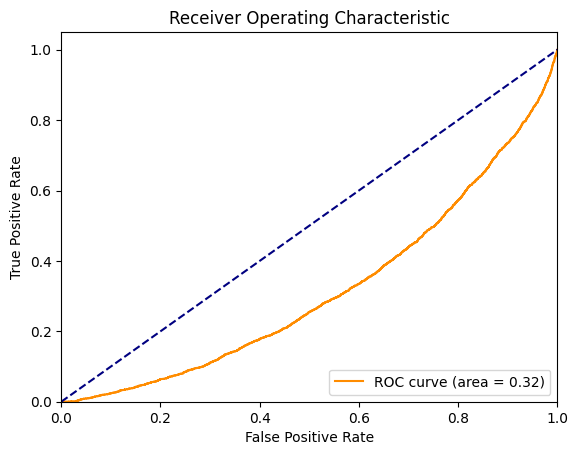

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the true labels and predicted probabilities
y_true = y_test
y_probas =np.array(listee)

# Calculate the fpr and tpr for different threshold settings
fpr, tpr, thresholds = roc_curve(y_true, y_probas)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Feature Importance')

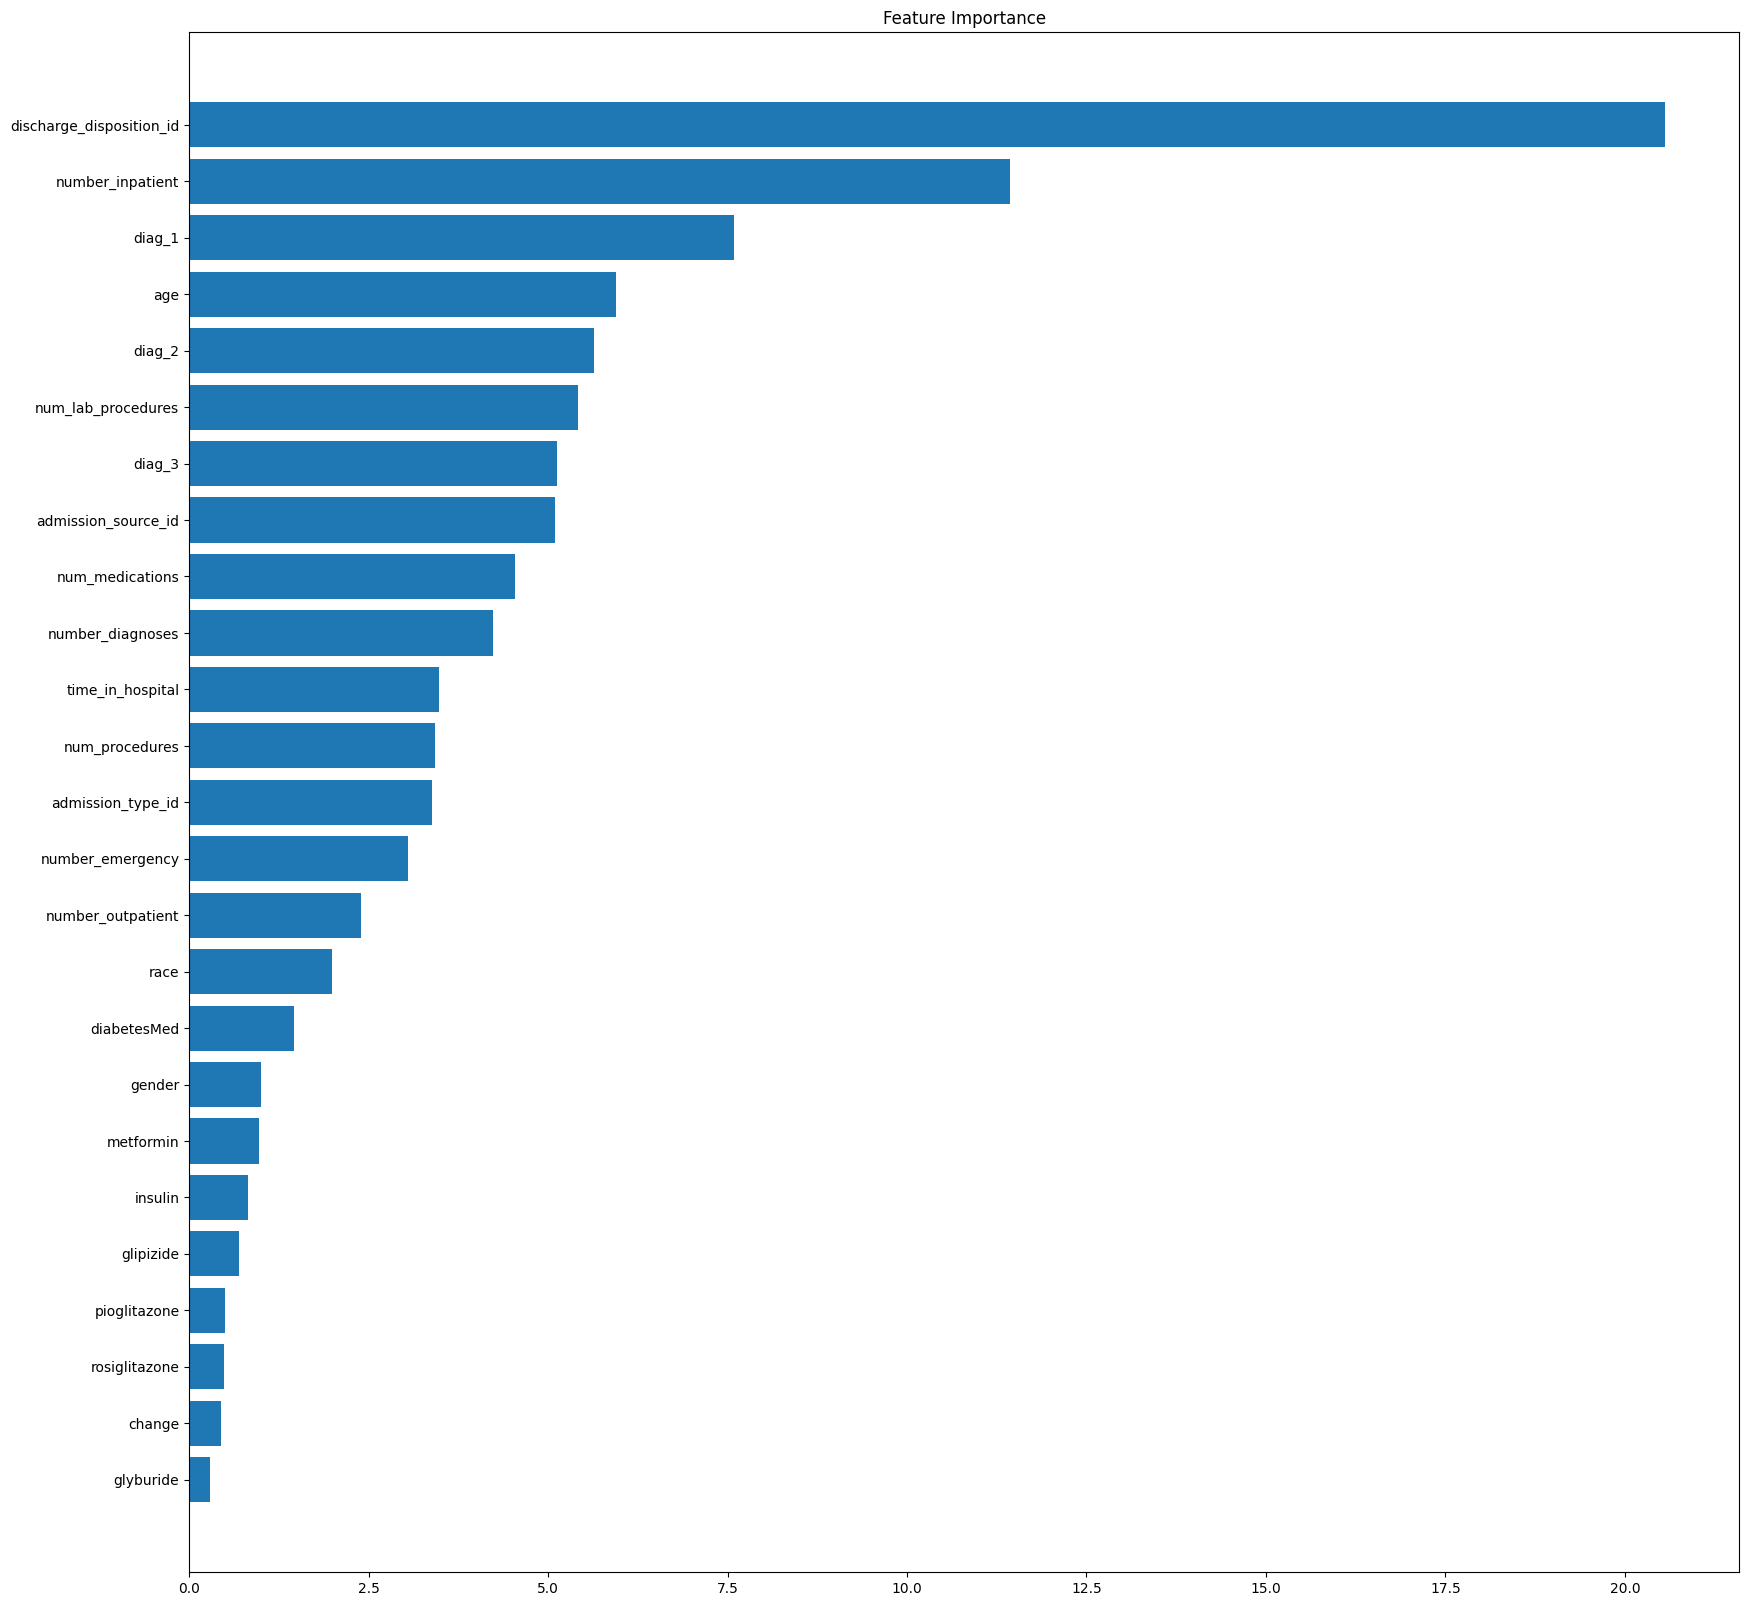

In [76]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(20, 20))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


In [48]:
sorted_idx

array([37, 36, 30, 35, 22, 34, 25, 31, 29, 20, 19, 28, 33, 18, 21, 26, 24,
       27, 23, 38, 39, 17, 32,  1, 10, 11,  0,  3,  8, 16,  5,  6,  2,  9,
       12, 15,  7, 14, 13,  4])

In [60]:
X_test.columns[sorted_idx[:25]]

Index(['discharge_disposition_id', 'diag_1', 'diag_2', 'num_lab_procedures',
       'diag_3', 'number_inpatient', 'num_medications', 'age',
       'time_in_hospital', 'admission_source_id', 'number_diagnoses',
       'num_procedures', 'admission_type_id', 'race', 'number_emergency',
       'number_outpatient', 'gender', 'insulin', 'metformin', 'diabetesMed',
       'change', 'glipizide', 'rosiglitazone', 'glyburide', 'pioglitazone'],
      dtype='object')

In [58]:
sorted_idx=sorted_idx[::-1]

In [1]:
import os
os.cpu_count()

4

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [24]:
df.groupby('patient_nbr')['readmitted']=='<30'

False

In [23]:
df['readmitted']

0          NO
1         >30
2          NO
3          NO
4          NO
         ... 
101761    >30
101762     NO
101763     NO
101764     NO
101765     NO
Name: readmitted, Length: 101763, dtype: object

In [26]:
df['readmitted']=df['readmitted'].apply(lambda x : 1 if x=='<30' else 0)